/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

Decision Tree Accuracy: 0.735375


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7999583333333333


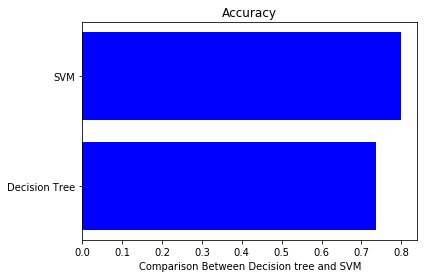

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
dataset = pd.read_csv('LoanDefaultData.csv', delimiter=',')
empty_cols = [i for i in range(30,36)]
dataset = dataset.drop(dataset.columns[empty_cols],axis=1)
#features = ["loan_default","AP001","AP002","AP003","AP004","CR009","CR017","CR018","CR019","PA022","PA023","PA028","PA029","PA030","PA031"]
features = ["loan_default","AP001","AP004","CR009"]
Final_data = dataset[features]
Final_data = Final_data.fillna(0)
Final_data.replace([-98, -99],0)
#print(Final_data.isnull())
# Final_data['AP002'] = Final_data['AP002'].map({1:'Male',2:'Female'})
X = Final_data.iloc[:,1:]
y = Final_data.iloc[:,0]
#print(sns.displot(Final_data['CR009']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

from sklearn.tree import DecisionTreeClassifier
logmodel = DecisionTreeClassifier()
logmodel.fit(X_train, y_train)

probs_y=logmodel.predict_proba(X_test)
score = logmodel.score(X_test, y_test)
print("Decision Tree Accuracy:",score)


from sklearn.svm import SVC
gb_model = SVC(kernel='rbf')
gb_model.fit(X_train, y_train)
y_pred=gb_model.predict(X_test)
svm=accuracy_score(y_test, y_pred)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",svm)

z=['Decision Tree','SVM']
t=[score,svm]
indices=np.arange(2)

import matplotlib.pyplot as plt
plt.title('Accuracy')
plt.barh(range(len(indices)), t, color='b', align='center')
plt.yticks(range(len(indices)), [z[i] for i in indices])
plt.xlabel('Comparison Between Decision tree and SVM')
plt.show()
